
# 1.Prepare : inport libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
!pip install squarify
import squarify
!pip install plotly --upgrade
import plotly.express as px


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 29.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


# *1.1  load data*

In [ ]:
# load dataset into gg colab
from google.colab import files
uploaded = files.upload()

Saving Dataset.xlsx to Dataset.xlsx


In [ ]:
# Read necessary sheet in uploaded file
orders = pd.read_excel(r'Dataset.xlsx', sheet_name='Orders')
segmentation=pd.read_excel(r'Dataset.xlsx', sheet_name='Segmentation')
returned=pd.read_excel(r'Dataset.xlsx', sheet_name='Return')
product=pd.read_excel(r'Dataset.xlsx', sheet_name='Product')

# *1.2 Check thông tin dataset*

In [ ]:
# review orders dataframe
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB


In [ ]:
# check if there any null values
orders.isnull().sum()

Row ID         0
Order ID       0
Order Date     0
Ship Date      0
Ship Mode      0
Customer ID    0
Channel        0
Postal Code    0
Product ID     0
Sales          0
Quantity       0
Unit Cost      0
dtype: int64

#*1.3 Gom các order ID lại*#

In [ ]:
# group order ID of each purchase
unique_order=orders.groupby(['Order ID','Order Date', 'Ship Date', 'Customer ID', 'Channel'])['Sales'].sum().reset_index()

unique_order.head()

,Order ID,Order Date,Ship Date,Customer ID,Channel,Sales
0,CA-2014-100006,2014-09-07,2014-09-13,DK-13375,Consumer,377.970
1,CA-2014-100090,2014-07-08,2014-07-12,EB-13705,Corporate,699.192
2,CA-2014-100293,2014-03-14,2014-03-18,NF-18475,Home Office,91.056
3,CA-2014-100328,2014-01-28,2014-02-03,JC-15340,Consumer,3.928
4,CA-2014-100363,2014-04-08,2014-04-15,JM-15655,Corporate,21.376


In [ ]:
unique_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order ID     5009 non-null   object        
 1   Order Date   5009 non-null   datetime64[ns]
 2   Ship Date    5009 non-null   datetime64[ns]
 3   Customer ID  5009 non-null   object        
 4   Channel      5009 non-null   object        
 5   Sales        5009 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 234.9+ KB


In [ ]:
#  check if these is any duplicate order ID in returned dataframe
returned['Order ID'].index.has_duplicates

False

In [ ]:
#  Find out what orders are completed and not being returned
Merge_orders=unique_order.merge(returned, on='Order ID', how='left', indicator=True )
order_list=Merge_orders.loc[Merge_orders['_merge']=='left_only', 'Order ID']
comp_orders=unique_order[unique_order['Order ID'].isin(order_list)]

In [ ]:
comp_orders.head()

,Order ID,Order Date,Ship Date,Customer ID,Channel,Sales
0,CA-2014-100006,2014-09-07,2014-09-13,DK-13375,Consumer,377.970
1,CA-2014-100090,2014-07-08,2014-07-12,EB-13705,Corporate,699.192
2,CA-2014-100293,2014-03-14,2014-03-18,NF-18475,Home Office,91.056
3,CA-2014-100328,2014-01-28,2014-02-03,JC-15340,Consumer,3.928
4,CA-2014-100363,2014-04-08,2014-04-15,JM-15655,Corporate,21.376


# # 2.RFM Analysis

# *2.1 Recency*


In [ ]:
# Create New dataframe called latest_pur which is grouped by Customer ID, filter the lastest date of purchase

lastest_pur=comp_orders.groupby(['Customer ID'])['Order Date'].max().reset_index()
lastest_pur.head()

,Customer ID,Order Date
0,AA-10315,2017-06-29
1,AA-10375,2017-12-11
2,AA-10480,2017-04-15
3,AA-10645,2016-09-04
4,AB-10015,2016-11-10


In [ ]:
# Create a variable called today_date which is a milestone date to calculate
today_date = dt.datetime(2017,12,31)

In [ ]:
# Create Dataframe called recency to pull out the latest purchase of each customer
recency = (today_date - lastest_pur.groupby("Customer ID").agg({"Order Date":"max"})).reset_index()

In [ ]:
# Change recency column "Order date" name into "Recency"
recency.rename(columns = {"Order Date":"Recency"}, inplace = True)
recency.head()

,Customer ID,Recency
0,AA-10315,185 days
1,AA-10375,20 days
2,AA-10480,260 days
3,AA-10645,483 days
4,AB-10015,416 days


In [ ]:
# Format recency column into days type
recency['Recency'] = recency["Recency"].apply(lambda x: x.days)
recency.head()

,Customer ID,Recency
0,AA-10315,185
1,AA-10375,20
2,AA-10480,260
3,AA-10645,483
4,AB-10015,416


In [ ]:
# Merge dataframe
recency=pd.merge(lastest_pur,recency, on='Customer ID', how='left')
recency.head()

,Customer ID,Order Date,Recency
0,AA-10315,2017-06-29,185
1,AA-10375,2017-12-11,20
2,AA-10480,2017-04-15,260
3,AA-10645,2016-09-04,483
4,AB-10015,2016-11-10,416


# *2.2 Frequency*

In [ ]:
# create frenquency df
frequency= comp_orders.groupby(['Customer ID'])['Order Date'].count().reset_index()
frequency.head()

,Customer ID,Order Date
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,5
4,AB-10015,3


In [ ]:
# Rename column  Order Date into Frequency
frequency.rename(columns = {"Order Date":"Frequency"}, inplace = True)
frequency.head()

,Customer ID,Frequency
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,5
4,AB-10015,3


In [ ]:
# Merge recency and frequency into rfm_df Dataframe
rfm_df=pd.merge(recency, frequency, on='Customer ID', how='left')

In [ ]:
rfm_df.head()

,Customer ID,Order Date,Recency,Frequency
0,AA-10315,2017-06-29,185,5
1,AA-10375,2017-12-11,20,9
2,AA-10480,2017-04-15,260,4
3,AA-10645,2016-09-04,483,5
4,AB-10015,2016-11-10,416,3


# *2.3 Monetary*

In [ ]:
# Create new column called total_sale, which calculate sum of all order from each Customer ID, to Orders dataframe


In [ ]:
# Create monetary dataframe by sum all Sales values from each Customer ID to calculate total sale from each customer.
monetary=comp_orders.groupby('Customer ID').agg({'Sales':'sum'}).reset_index()
monetary.head()

,Customer ID,Sales
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5073.975
4,AB-10015,886.156


In [ ]:
# rename column
monetary.rename(columns={'Sales':'Monetary'}, inplace=True)
monetary.head()

,Customer ID,Monetary
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5073.975
4,AB-10015,886.156


In [ ]:
# merge monetary dataframe with rfm_df DataFrame to create RFM dataframe
rfm_df=pd.merge(rfm_df, monetary, on ='Customer ID', how='left')
rfm_df.head()

,Customer ID,Order Date,Recency,Frequency,Monetary
0,AA-10315,2017-06-29,185,5,5563.560
1,AA-10375,2017-12-11,20,9,1056.390
2,AA-10480,2017-04-15,260,4,1790.512
3,AA-10645,2016-09-04,483,5,5073.975
4,AB-10015,2016-11-10,416,3,886.156


In [ ]:
# Drop column 'Order Date" from rfm_df dataframe
rfm_df.drop(['Order Date'],axis=1, inplace=True)
rfm_df.head()

,Customer ID,Recency,Frequency,Monetary
0,AA-10315,185,5,5563.560
1,AA-10375,20,9,1056.390
2,AA-10480,260,4,1790.512
3,AA-10645,483,5,5073.975
4,AB-10015,416,3,886.156


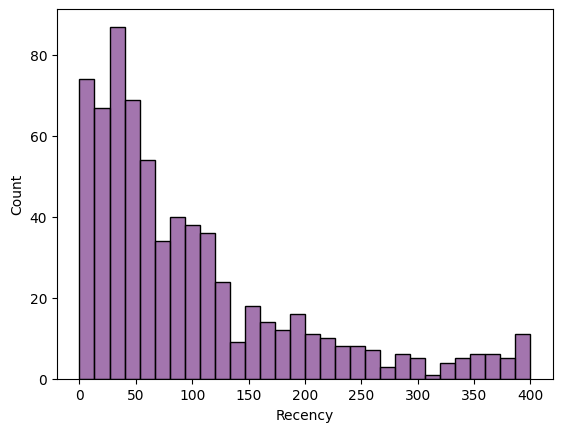

In [ ]:
# Draw column chart of Recency
pal=sns.set_palette('PRGn')
sns.histplot(data=rfm_df, x='Recency', stat='count',binrange=[0,400], bins=30, color=pal)
plt.show()

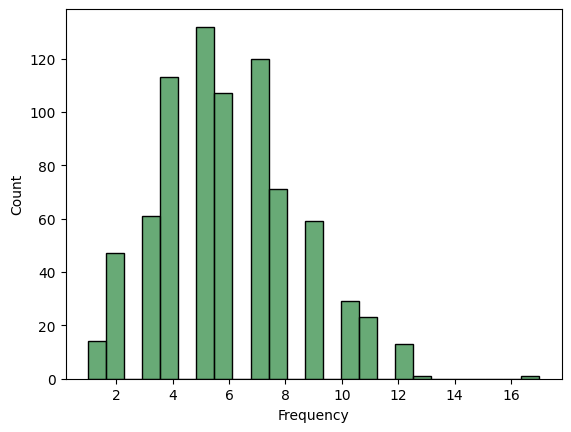

In [ ]:
# # Draw column chart of Frequency
pal=sns.set_palette('PRGn_r')
sns.histplot(data=rfm_df, x='Frequency', stat='count',color=pal)
plt.show()

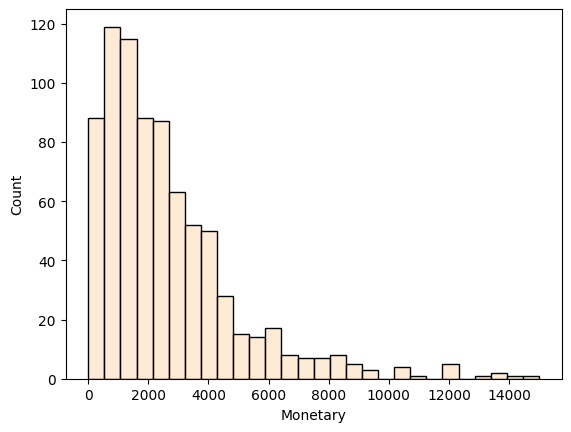

In [ ]:
# Draw column chart of Monetary
pal=sns.set_palette('Oranges')
sns.histplot(data=rfm_df, x='Monetary',binrange=[0,15000],color=pal)
plt.show()

# **3. Calculating RFM Scores**

In [ ]:
#Building RFM score
rfm_df["R"] = pd.qcut(rfm_df["Recency"],5,labels=[5,4,3,2,1])
rfm_df["F"] = pd.qcut(rfm_df["Frequency"],5,labels=[1,2,3,4,5])
rfm_df["M"] = pd.qcut(rfm_df["Monetary"],5,labels=[1,2,3,4,5])
rfm_df["cusRFM_Score"] = rfm_df["R"].astype(str) +rfm_df["F"].astype(str) + rfm_df["M"].astype(str)

In [ ]:
rfm_df.head()

,Customer ID,Recency,Frequency,Monetary,R,F,M,cusRFM_Score
0,AA-10315,185,5,5563.560,2,2,5,225
1,AA-10375,20,9,1056.390,5,5,2,552
2,AA-10480,260,4,1790.512,2,1,3,213
3,AA-10645,483,5,5073.975,1,2,5,125
4,AB-10015,416,3,886.156,1,1,2,112


In [ ]:
# rename column of segmentation dataframe
segmentation.rename(columns={'RFM Score':'rfm_score'}, inplace=True)
segmentation.head()

,Segment,rfm_score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."


In [ ]:
# Seperate string in rfm_score in segmentation df into rows
segmentation = segmentation.assign(rfm_score=segmentation.rfm_score.str.split(",")).explode('rfm_score')

segmentation

,Segment,rfm_score
0,Champions,555
0,Champions,554
0,Champions,544
0,Champions,545
0,Champions,454
...,...,...
10,Lost customers,112
10,Lost customers,121
10,Lost customers,131
10,Lost customers,141


In [ ]:
segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    125 non-null    object
 1   rfm_score  125 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


In [ ]:
# clear space in frm_score column after after split string
segmentation['rfm_score']=segmentation['rfm_score'].str.strip()

In [ ]:
# merge segmentation dataframe  with rfm_df dataframe
merge_df=rfm_df.merge(segmentation, left_on='cusRFM_Score', right_on='rfm_score', how='left')

In [ ]:
merge_df.head()

,Customer ID,Recency,Frequency,Monetary,R,F,M,cusRFM_Score,Segment,rfm_score
0,AA-10315,185,5,5563.560,2,2,5,225,At Risk,225
1,AA-10375,20,9,1056.390,5,5,2,552,Potential Loyalist,552
2,AA-10480,260,4,1790.512,2,1,3,213,About To Sleep,213
3,AA-10645,483,5,5073.975,1,2,5,125,At Risk,125
4,AB-10015,416,3,886.156,1,1,2,112,Lost customers,112


In [ ]:
#  group by segment
segment=merge_df.groupby('Segment').agg({'Customer ID':'count'}).sort_values('Customer ID',ascending=False).reset_index()

In [ ]:
segment

,Segment,Customer ID
0,Potential Loyalist,113
1,At Risk,96
2,Hibernating customers,90
3,Lost customers,83
4,Need Attention,72
5,Champions,71
6,Promising,63
7,Loyal,62
8,New Customers,61
9,About To Sleep,44


In [ ]:
# # Draw pie plot to show each segment percentage in total
# colors  = ("darkorange", "darkseagreen", "orange", "cyan", "cadetblue", "hotpink", "lightsteelblue", "coral",  "mediumaquamarine","palegoldenrod","hotpink")

# merge_df["Segment"].value_counts(sort=True).plot.pie(colors=colors,
#                                                  textprops={'fontsize': 8},
#                                                  autopct = '%.1f',
#                                                  startangle= 70,
#                                                  radius =1,
#                                                  rotatelabels=True
#                                                 )
# plt.ylabel("");

In [ ]:
fig = px.pie(segment, values = 'Customer ID', names = 'Segment',template = 'plotly_dark')

fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

**Insight:**
*   Nhóm khách hàng '*Potential Loyalist'* chiếm tỷ lệ lớn nhất, vì đây là nhóm khách hàng trung thành nên tập trung vào việc chăm sóc những khách hàng này bằng cách đưa ra chương trình khuyến mại nhân dịp lễ cho khách hàng lâu năm
*   Nhóm '*At Risk* chiếm tỷ trọng thứ 2, là nhóm có khả năng đang có xu hướng rời bỏ, cần thực hiện khảo sát trên nhóm này để tìm hiểu nguyên nhân từ đó đưa ra giải pháp khắc phục
*   Nhóm '*Lost customers*' là tệp KH đã rời bỏ vĩnh viễn nên không nằm trong mục tiêu
*   Nhóm '*need attention*' cần phải thực hiên chăm sóc khách hàng nhiều hơn để nắm rõ nhu cầu và mối quan tâm của họ từ đó chạy chương trình phù hợp, để biến nhóm khách hàng này thành nhóm khách hàng tiềm năng
*   Nhóm '*Champions*' là những KH trung thành và lâu năm nên cần đưa ra chính sách khuyến mại lớn và có thể kèm theo quà tặng như 1 cách để tri ân KH
*   Nhóm '*Promissing*' là KH triển vọng nên cần tìm hiểu kỹ tệp KH này, xem những mặt hàng chủ yếu của nhóm này và có thể chạy chương trình mua 1 tặng 1
Nhóm '*Loyal *' tương tự nhóm Champions






# 4.Analyze

# 4.1 percentage of customer who buy more than 1 order

In [ ]:
# use dataframe comp_order, which is eliminated all returned order, to count number of orders by customers
number_of_orders = comp_orders.groupby('Customer ID')['Order ID'].count().sort_values(ascending=False)
#Rename column in number_of_orders df
number_of_orders_df = pd.DataFrame(list(number_of_orders.items()), columns=['Customer ID', 'Number of Orders'])
# Draw pie chart to show percentage of customer who by more than 1 orders
a = number_of_orders_df[number_of_orders_df['Number of Orders'] == 1].value_counts().sum()
b = number_of_orders_df[number_of_orders_df['Number of Orders'] != 1].value_counts().sum()

data = {'Order': ['One Order', 'More than One Order'], 'Customer_Counts': [a, b]}

order_counts = pd.DataFrame.from_dict(data)

fig = px.pie(order_counts,
             values = order_counts.Customer_Counts,
             names = order_counts.Order,
             template = 'plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=16,
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

**Insight:** Đa số khách hàng đều đặt mua nhiều hơn 1 đơn hàng

# 4.2 Analyze category

In [ ]:
product=product.drop_duplicates(subset='Product ID', keep='first')
# df = df.drop_duplicates(subset='favorite_color', keep="first"

In [ ]:
# From orders df, eliminate all returned orders to create product_categories df
orders_and_return = orders.merge(returned, on='Order ID', how='left', indicator=True )
sud_df = orders_and_return.loc[orders_and_return['_merge']=='left_only', 'Order ID']
all_comp_orders = orders[orders['Order ID'].isin(sud_df)]

In [ ]:
product_category= all_comp_orders.merge(product, on='Product ID', how='left')

In [ ]:
# Create new df called number_of_prod which present number of order in each category
number_of_prod = product_category.groupby('Category')['Customer ID'].count().sort_values(ascending=False).reset_index()
# Rename column
number_of_prod.rename(columns = {'Customer ID':'Number_of_Products'}, inplace = True)
# Draw pie chart to show which category has highest purchases
fig = px.pie(number_of_prod,
             values='Number_of_Products',
             names = 'Category',
             template = 'plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 6)))
fig.show()

**Insight:** Phần lớn đơn hàng được mua thuộc hạng mục Office Supplies => Công ty nên tập trung vào các sản phẩm thuộc hạng mục này.




# 4.3 category by segment

In [ ]:
product_category.head(2)

,Row ID_x,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Row ID_y,Category,Sub-Category,Product Name
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,554,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,719,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass..."


In [ ]:
# drop column
product_category=product_category.drop(['Postal Code','Unit Cost','Row ID_x','Row ID_y','Product Name'], axis=1)

In [ ]:
# merge product_category DF with merge_df DF to get a DF has all orders, customer ID an segment name
product_category_segment=product_category.merge(merge_df, how='left', on='Customer ID')

In [ ]:
product_category_segment.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Product ID,Sales,Quantity,Category,Sub-Category,Recency,Frequency,Monetary,R,F,M,cusRFM_Score,Segment,rfm_score
0,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,OFF-AP-10002457,209.300,2,Office Supplies,Appliances,1,8,2133.180,5,4,3,543,Loyal,543
1,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,FUR-BO-10003441,323.136,4,Furniture,Bookcases,1,7,2493.214,5,3,4,534,Need Attention,534


In [ ]:
# Count number of order by segment
num_order_by_segment = product_category_segment.groupby('Segment')['Order ID'].count().sort_values(ascending=False).reset_index()

# Rename column
num_order_by_segment.rename(columns = {'Order ID':'Number_of_orders'}, inplace = True)

In [ ]:
# Draw pie chart to show which category has highest purchases
fig = px.pie(num_order_by_segment,
             values='Number_of_orders',
             names = 'Segment',
             template = 'plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 6)))
fig.show()

**Insight**: So với bảng phân bổ khách hàng theo từng Segment trước đó, thì bảng phân bổ lượng orders theo mỗi segment có sự khác biệt rõ:
- Nhóm "At Risk" có số lượng orders lớn nhất (đây cũng là nhóm có số lượng KH đứng thứ 2 -> Vì thế những KH ở nhóm này trở thành mục tiêu quan trọng trong chiến dịch MKT của cty vì lượng KH lẫn số đơn đều lớn, nhưng lại đang nằm trong nhóm có khả năng mất đi.
- Nhóm "Potential Loyalist" có số lượng orders sấp xỉ với nhóm "At Risk"
- Nhóm "Champion" và "Loyal" dù lượng KH không phải quá lớn (theo bảng phân bổ số lượng KH theo segment trước đó) thì đứng thứ 3 về số lượng đơn hàng.
-Nhóm "Need Attention" đứng thứ 5 về số lượng KH và chiếm đến 10.7% số lượng đơn đặt hàng => cần chú ý thúc đẩy doanh số của nhóm này

# 4.4. Number of cancelled order

Figure out how many orders had been cancelled

In [ ]:
returned_order= orders_and_return.merge(product, on='Product ID', how='left')

In [ ]:
# Filter all orders that had been returned into cancelled_order DF
cancelled_order=returned_order[returned_order['Returned']=='Yes']

In [ ]:
cancelled_order.head()

,Row ID_x,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Returned,_merge,Row ID_y,Category,Sub-Category,Product Name
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926,Yes,both,535,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl"
5,1298,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10004632,20.720,2,7.1225,Yes,both,575,Office Supplies,Binders,Ibico Hi-Tech Manual Binding System
12,5457,CA-2017-130631,2017-12-29,2018-01-02,Standard Class,BS-11755,Consumer,98026,OFF-FA-10000089,19.600,5,1.9992,Yes,both,1774,Office Supplies,Fasteners,Acco Glide Clips
13,5458,CA-2017-130631,2017-12-29,2018-01-02,Standard Class,BS-11755,Consumer,98026,FUR-FU-10004093,68.460,2,23.9610,Yes,both,1193,Furniture,Furnishings,Hand-Finished Solid Wood Document Frame
24,954,CA-2017-136539,2017-12-28,2018-01-01,Standard Class,GH-14665,Consumer,78664,OFF-AR-10001958,27.168,2,12.2256,Yes,both,209,Office Supplies,Art,Stanley Bostitch Contemporary Electric Pencil ...


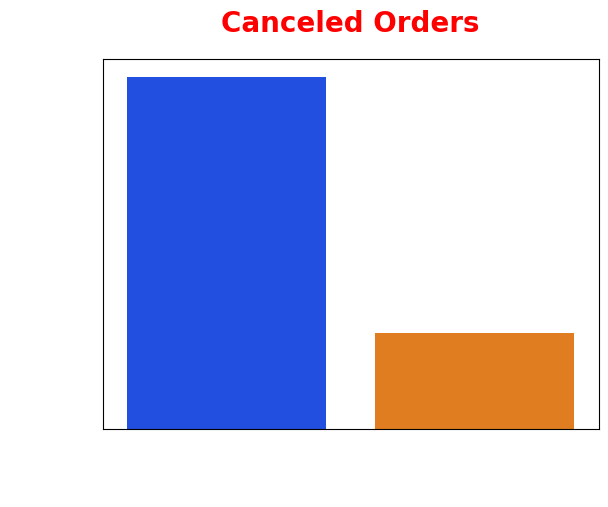

In [ ]:
c = product_category_segment['Customer ID'].nunique() + cancelled_order ['Order ID'].nunique()
d = cancelled_order ['Order ID'].nunique()

data = {'Orders': ['Total Orders', 'Canceled Orders'], 'Order_Counts': [c, d]}

order_counts = pd.DataFrame.from_dict(data)

fig, ax = plt.subplots()
sns.barplot(ax = ax, data = order_counts, x=order_counts.Orders, y=order_counts.Order_Counts, palette= 'bright')

ax.tick_params(axis='y', colors='white', labelsize=10)

ax.set_title("Canceled Orders", fontsize = 20, pad = 20, color='red', fontweight='bold')
ax.set_xlabel("Orders", fontsize = 18, labelpad = 12, color='white')
ax.set_ylabel("Counts", fontsize = 18, labelpad = 12, color='white')
ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)

** Insight**: Khoảng 27% số orders bị trả lại


# 4.5 Which segment that returned orders in?

In [ ]:
fig = px.treemap(cancelled_order,
                 path=['Sub-Category'], template='plotly_dark')
fig.update_traces(textfont_color='yellow',textfont_size=16, selector=dict(type='treemap'))
fig.show()

**Insight**: Hầu hết các order bị return nằm trong nhóm Binders, Paper, phones và Furishings